In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.path import Path
import proplot as pplt
import seaborn as sns

In [2]:
pplt.rc['axes.grid'] = False
pplt.rc['cmap.discrete'] = False

In [3]:
def rotate(x, y, phi):
    xr = x * np.cos(phi) - y * np.sin(phi)
    yr = x * np.sin(phi) + y * np.cos(phi)
    return xr, yr

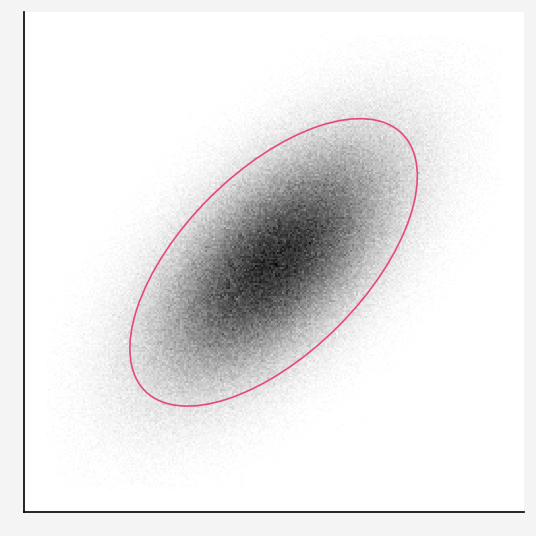

In [4]:
a = 1.0
b = 0.5
phi = 45.0 # [deg]

n = 1000000
scale = 0.5 * np.array([a, b])
x, y = np.random.normal(scale=scale, size=(n, 2)).T
x, y = rotate(x, y, np.radians(phi)) 

fig, ax = pplt.subplots()
xmax = 1.25
sns.histplot(ax=ax, x=x, y=y, cmap='mono', ec='None', binrange=[(-xmax, xmax), (-xmax, xmax)])
ax.add_patch(patches.Ellipse((0.0, 0.0), 2 * a, 2 * b, angle=phi, 
                             fill=False, color='pink6'))
xmax = 1.25
ax.format(xticks=[], yticks=[])
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
plt.savefig('/Users/austin/Research/ellipse.png', dpi=500)
plt.show()

In [5]:
def uniform_circle(r=1.0, n=100):
    psi = np.random.uniform(0.0, 2.0 * np.pi, n)
    r = np.sqrt(np.random.uniform(0.0, r, n))
    x = r * np.cos(psi)
    y = r * np.sin(psi)
    return x, y

In [21]:
def rectangle(ax, xmax=1.0, ymax=1.0, center=None, **kws):
    kws.setdefault('fill', False)
    if center is None:
        center = (0.0, 0.0)
    width = 2.0 * xmax
    height = 2.0 * ymax
    ax.add_patch(patches.Rectangle((center[0] - xmax, center[1] - ymax), width, height, **kws))

In [22]:
def circle(ax, r, center=None, **kws):
    kws.setdefault('fill', False)
    if center is None:
        center = (0.0, 0.0)
    ax.add_patch(patches.Circle(center, r, **kws))

In [49]:
n = int(1e7)
x, xp = uniform_circle(n=n)
y, yp = uniform_circle(n=n)

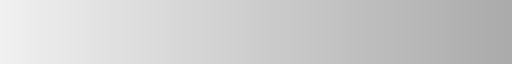

In [91]:
cmap = pplt.Colormap('Mono', left=0.05, right=0.3)
cmap

In [92]:
xfoil = yfoil = 1.0

psi = np.linspace(0.0, 0.5 * np.pi, 20)
tt = np.linspace(0.0, 1.0, 1000)
xinj = xfoil - np.sqrt(tt)
yinj = yfoil - np.sqrt(1.0 - tt)

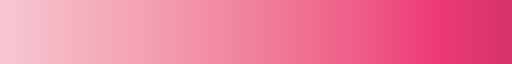

In [93]:
cmap2 = pplt.Colormap('pink7', left=0.3)
cmap2

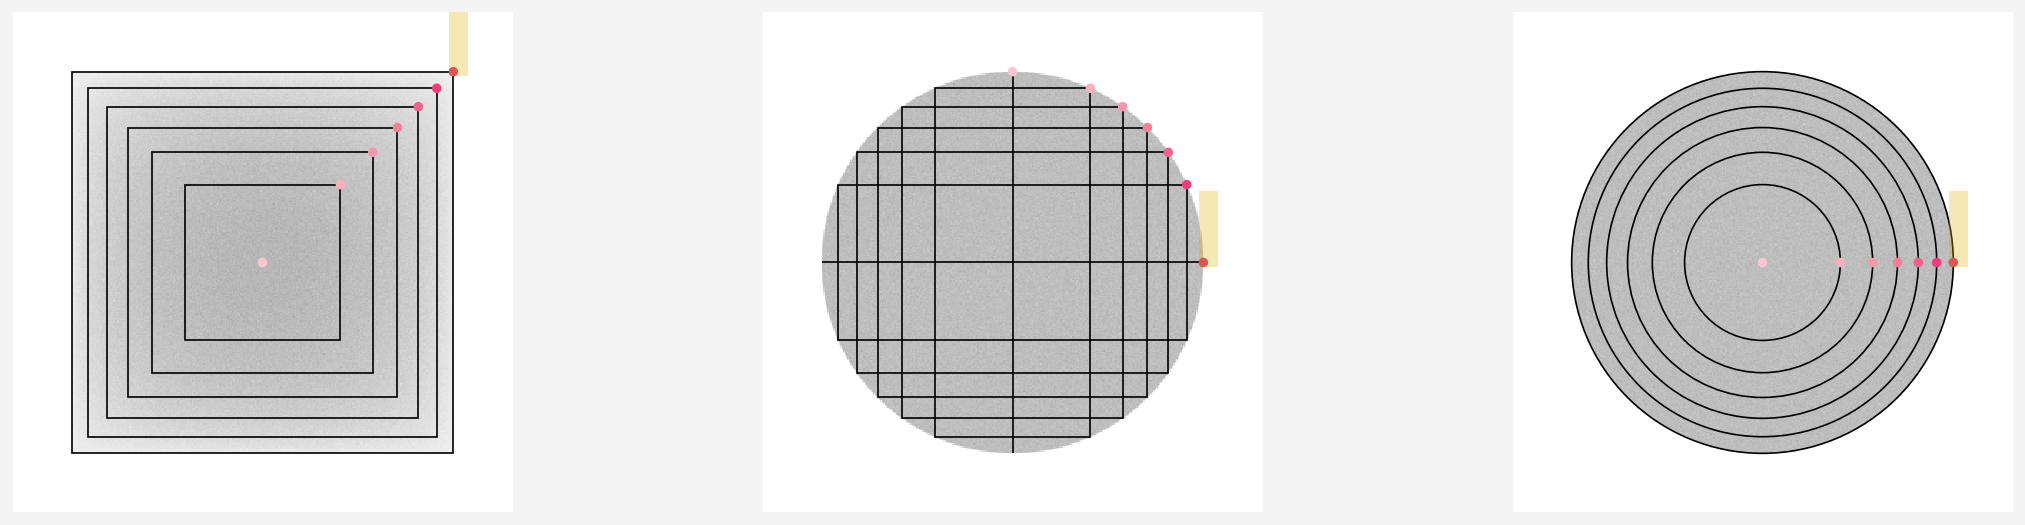

In [94]:
steps = 7
tt = np.linspace(0.0, 1.0, steps)
colors = pplt.Cycle(cmap2, steps).by_key()['color']
xlim = 1.0
limits = [(-xlim, xlim), (-xlim, xlim)]
hist_kws = dict(
    cmap=cmap, ec='None',
    binrange=limits,
    # alpha=0.5,
)
rdot = 0.025
cdot = 'pink6'

fig, axes = pplt.subplots(ncols=3, wspace=10.0)

for ax, kind in zip(axes, ['correlated', 'anti-correlated', 'elliptical']):
        
    if kind == 'correlated':
        sns.histplot(ax=ax, x=x, y=y, **hist_kws)
    elif kind == 'anti-correlated' or kind == 'elliptical':
        sns.histplot(ax=ax, x=x, y=xp, **hist_kws)

    for i, t in enumerate(tt):
        xmax = np.sqrt(t)
        ymax = np.sqrt(1.0 - t)
        if kind == 'correlated':
            rectangle(ax, xmax, xmax)
        elif kind == 'anti-correlated':
            rectangle(ax, xmax, ymax)
        elif kind == 'elliptical':
            circle(ax, xmax)

        xdot = xmax
        ydot = ymax
        calpha = np.linspace(0.3, 1.0, len(tt))[i]
        ckws = dict(fill=True, color=colors[i], ec='None')
        if kind == 'correlated':
            circle(ax, rdot, center=(xdot, xdot), **ckws)
        elif kind == 'anti-correlated':
            circle(ax, rdot, center=(xdot, ydot), **ckws)
        elif kind == 'elliptical':
            circle(ax, rdot, center=(xdot, 0.0), **ckws)
            
        
    width = 4.0 * rdot
    height = 16.0 * rdot
    rect_kws = dict(color='gold', alpha=0.3, ec='None')
    if kind == 'correlated':
        xfoil, yfoil = 1.0, 1.0
    else:
        xfoil, yfoil = 1.0, 0.0
    offset = 1.0 * rdot
    ax.add_patch(
        patches.Rectangle((xfoil - offset, yfoil - offset), width, height, **rect_kws)
    )
xpad = xlim + 0.31
axes.format(xticks=[], yticks=[], xlim=(-xpad, xpad), ylim=(-xpad, xpad))
for ax in axes:
    for side in ['left', 'right', 'top', 'bottom']:
        ax.spines[side].set_visible(False)
plt.savefig('/Users/austin/Research/docs/presentations/defense/painting.png', dpi=500)
plt.show()